### k-近邻算法概述

k-近邻算法的优缺点

- 优点： 精度高、对异常值不敏感、无数据输入假定。
- 缺点：计算复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

k-近邻算法的**工作原理**：存在一个样本数据集合，即训练样本集，并且样本集中每个数据都存在标签。输入没有标签的新数据之后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似数据的分类标签。通常选择样本数据集中前k个最相似的数据，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。

k-近邻算法的处理流程：

(1) 收集数据：可以使用任何方法。  
(2) 准备数据：距离计算所需要的数值，最好是结构化的数据格式。  
(3) 分析数据：可以使用任何方法。  
(4) 训练算法：此步骤不适用于k近邻算法。  
(5) 测试算法：计算错误率。
(6) 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

In [55]:
import kNN

In [56]:
group, labels = kNN.createDataSet()

In [57]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [58]:
labels

['A', 'A', 'B', 'B']

In [59]:
import numpy as np

In [60]:
groupMat = np.mat(group)

In [61]:
groupMat

matrix([[ 1. ,  1.1],
        [ 1. ,  1. ],
        [ 0. ,  0. ],
        [ 0. ,  0.1]])

In [62]:
import matplotlib.pyplot as plt

In [63]:
fig = plt.figure()

In [64]:
ax = fig.add_subplot(111)

In [65]:
mat0 = groupMat[np.nonzero(groupMat[:,0] == 1)[0],:]

In [66]:
mat1 = groupMat[np.nonzero(groupMat[:,0] != 1)[0],:]

In [67]:
mat0

matrix([[ 1. ,  1.1],
        [ 1. ,  1. ]])

In [68]:
mat1

matrix([[ 0. ,  0. ],
        [ 0. ,  0.1]])

In [69]:
mat0[:,0] - 0.1

matrix([[ 0.9],
        [ 0.9]])

In [70]:
ax.scatter(mat0[:,0].flatten().A[0], mat0[:,1].flatten().A[0], s=8, c='red')

In [71]:
ax.scatter(mat1[:,0].flatten().A[0], mat1[:,1].flatten().A[0], s=8, c='blue')

In [72]:
(mat0[:,0] - 0.1).flatten().A[0]

array([ 0.9,  0.9])

In [73]:
bias = 0.04
bias1 = 0.02
for i in range(mat0.shape[0]):
    ax.text(mat0[i,0] - bias, mat0[i,1] - bias1, 'A')
for i in range(mat1.shape[0]):
    ax.text(mat1[i,0] + bias1, mat1[i,1] - bias1, 'B')

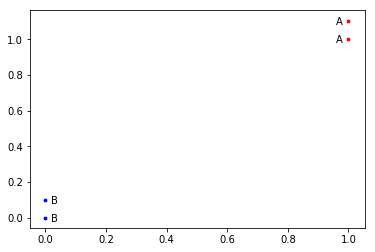

In [74]:
plt.show()

### 实施kNN算法

伪代码如下：

    对未知类别属性的数据集中的每个点依次执行以下操作：
    (1) 计算已知类别数据集中的点与当前点之间的距离
    (2) 按照距离递增次序排序
    (3) 选取与当前点距离最小的k个点
    (4) 确定前k个点所在类别的出现概率
    (5) 返回前k个点出现频率最高的类别作为当前点的预测分类

在kNN.py的classify0函数中距离计算使用到的是欧式距离公式，计算两个点xA和xB的距离为：

$$d = \sqrt{(xA_{0} - xB_{0})^{2} + (xA_{1} - xB_{1})^{2}}$$

In [75]:
kNN.classify0([0,0], group, labels, 3)

'B'

In [76]:
reload(kNN)

<module 'kNN' from 'kNN.pyc'>

In [77]:
datingDataMat, datingLabels = kNN.file2matrix('datingTestSet.txt')

In [78]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [79]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

In [80]:
fig = plt.figure()

In [81]:
ax = fig.add_subplot(111)

In [82]:
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

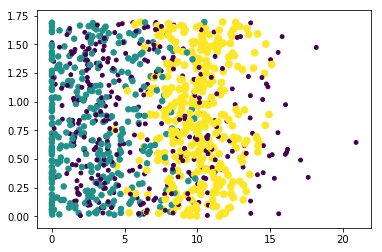

In [83]:
plt.show()

In [84]:
fig = plt.figure()

In [85]:
ax = fig.add_subplot(111)

In [86]:
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

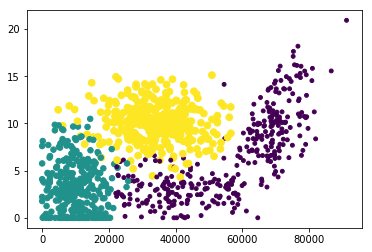

In [87]:
plt.show()

归一化数值的方法可以利用如下的公式：

$$newValue = (oldValue - min) / (max - min)$$

In [88]:
reload(kNN)

<module 'kNN' from 'kNN.pyc'>

In [89]:
normMat, ranges, minVals = kNN.autoNorm(datingDataMat)

In [90]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [91]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [92]:
minVals

array([ 0.      ,  0.      ,  0.001156])

In [93]:
kNN.datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [97]:
reload(kNN)

<module 'kNN' from 'kNN.py'>

In [98]:
kNN.classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses
